In [6]:
#  Smart Thermostat Agent (Non-ML, Rule-Based)

temperature_memory = []  

def thermostat_agent(current_temp):
    
    temperature_memory.append(current_temp)
    if len(temperature_memory) > 5:
        temperature_memory.pop(0)

    
    if current_temp < 20:
        return "Heating ON (Too Cold)"
    elif current_temp > 24:
        return "Cooling ON (Too Hot)"
    else:
        return "Do Nothing (Temperature Normal)"


print("=== Thermostat Agent Simulation ===")
print("Temperature range target: 20°C - 24°C")
print("Type 'q' to quit.\n")

while True:
    temp_input = input("Enter current room temperature: ")

    if temp_input.lower() == "q":
        print("\nSimulation Ended.")
        break

    try:
        current_temp = float(temp_input)
        decision = thermostat_agent(current_temp)

        print(f"Temperature Memory: {temperature_memory}")
        print(f"Agent Decision: {decision}\n")

    except ValueError:
        print("❌ Invalid input! Please enter a number.\n")


=== Thermostat Agent Simulation ===
Temperature range target: 20°C - 24°C
Type 'q' to quit.

Temperature Memory: [20.0]
Agent Decision: Do Nothing (Temperature Normal)

Temperature Memory: [20.0, 5.0]
Agent Decision: Heating ON (Too Cold)

Temperature Memory: [20.0, 5.0, -5.0]
Agent Decision: Heating ON (Too Cold)

Temperature Memory: [20.0, 5.0, -5.0, 33.0]
Agent Decision: Cooling ON (Too Hot)

Temperature Memory: [20.0, 5.0, -5.0, 33.0, 8.0]
Agent Decision: Heating ON (Too Cold)

Temperature Memory: [5.0, -5.0, 33.0, 8.0, 37.0]
Agent Decision: Cooling ON (Too Hot)


Simulation Ended.


In [ ]:
import random
                                          #check

class Environment:
    def __init__(self):
        
        self.rooms = {'A': 'Dirty', 'B': 'Dirty', 'C': 'Dirty'}
        self.agent_location = 'A'
        self.clean_count = 0  

    def get_percept(self):
        return self.agent_location, self.rooms[self.agent_location]

    def execute_action(self, action):
        if action == 'Vacuum':
           
            if self.rooms[self.agent_location] == 'Dirty':
                self.rooms[self.agent_location] = 'Clean'
                self.clean_count += 1  
        elif action == 'Right':
            if self.agent_location == 'A':
                self.agent_location = 'B'
            elif self.agent_location == 'B':
                self.agent_location = 'C'
        elif action == 'Left':
            if self.agent_location == 'C':
                self.agent_location = 'B'
            elif self.agent_location == 'B':
                self.agent_location = 'A'
        elif action == 'RandomMove':
            self.agent_location = random.choice(['A', 'B', 'C'])  


class SimpleReflexAgent:
    def __init__(self):
       
        self.rules = {
            ('A', 'Dirty'): 'Vacuum',
            ('B', 'Dirty'): 'Vacuum',
            ('C', 'Dirty'): 'Vacuum',
            ('A', 'Clean'): 'Right',
            ('B', 'Clean'): 'Right',
            ('C', 'Clean'): 'Left'
        }

    def select_action(self, percept, all_rooms):
        
        if all(status == 'Clean' for status in all_rooms.values()):
            return 'RandomMove'
        return self.rules.get(percept, 'NoOp')

env = Environment()
agent = SimpleReflexAgent()

for step in range(10):
    percept = env.get_percept()
    action = agent.select_action(percept, env.rooms)
    print(f"Step {step + 1}: Percept: {percept}, Action: {action}")
    env.execute_action(action)
    print(f"   Rooms: {env.rooms}")
    print(f"   Clean count: {env.clean_count}\n")
#w

Step 1: Percept: ('A', 'Dirty'), Action: Vacuum
   Rooms: {'A': 'Clean', 'B': 'Dirty', 'C': 'Dirty'}
   Clean count: 1

Step 2: Percept: ('A', 'Clean'), Action: Right
   Rooms: {'A': 'Clean', 'B': 'Dirty', 'C': 'Dirty'}
   Clean count: 1

Step 3: Percept: ('B', 'Dirty'), Action: Vacuum
   Rooms: {'A': 'Clean', 'B': 'Clean', 'C': 'Dirty'}
   Clean count: 2

Step 4: Percept: ('B', 'Clean'), Action: Right
   Rooms: {'A': 'Clean', 'B': 'Clean', 'C': 'Dirty'}
   Clean count: 2

Step 5: Percept: ('C', 'Dirty'), Action: Vacuum
   Rooms: {'A': 'Clean', 'B': 'Clean', 'C': 'Clean'}
   Clean count: 3

Step 6: Percept: ('C', 'Clean'), Action: RandomMove
   Rooms: {'A': 'Clean', 'B': 'Clean', 'C': 'Clean'}
   Clean count: 3

Step 7: Percept: ('B', 'Clean'), Action: RandomMove
   Rooms: {'A': 'Clean', 'B': 'Clean', 'C': 'Clean'}
   Clean count: 3

Step 8: Percept: ('A', 'Clean'), Action: RandomMove
   Rooms: {'A': 'Clean', 'B': 'Clean', 'C': 'Clean'}
   Clean count: 3

Step 9: Percept: ('A', 'Clean'

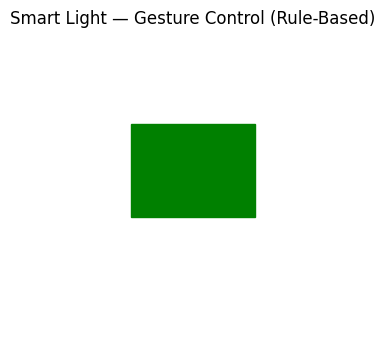

Smart Light Off ✅


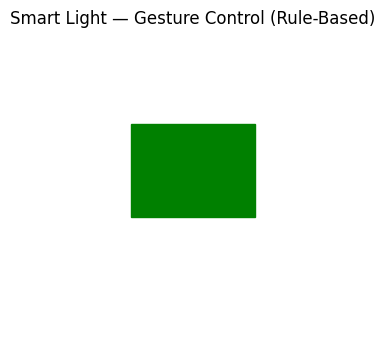

In [ ]:
#Smart Light Agent 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, clear_output


fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_title("Smart Light — Gesture Control (Rule-Based)")
ax.axis("off")


bulb = Rectangle((3,4), 4, 3, color="gray")
ax.add_patch(bulb)
display(fig)

def update_light(color):
    bulb.set_color(color)
    clear_output(wait=True)
    display(fig)


while True:
    gesture = input(
        "Enter Gesture: (f = Fist, o = Open Hand, t = Thumbs Up, q = Quit): "
    ).lower()

    
    if gesture == 'f':
        update_light("red")      
    elif gesture == 'o':
        update_light("green")    
    elif gesture == 't':
        update_light("blue")     
    elif gesture == 'q':
        print("Smart Light Off ✅")
        break
    else:
        update_light("gray")     
